Мировой рейтинг университетов ([kaggle](https://www.kaggle.com/mylesoneill/world-university-rankings))

In [32]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Чтение данных. Какие русские университеты входят в список?

In [73]:
data = pd.read_csv('cwurData.csv', header=0)
print(data.shape)
print(data['institution'][data['country'] == 'Russia'])

(2200, 14)
189              Lomonosov Moscow State University
247              Lomonosov Moscow State University
484              Saint Petersburg State University
1115                  Novosibirsk State University
1258             Lomonosov Moscow State University
1449    Moscow Institute of Physics and Technology
1605             Saint Petersburg State University
1954    National Research Nuclear University MEPhI
2184                  Novosibirsk State University
Name: institution, dtype: object


In [74]:
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


Данные в столбцах представляют собой рейтинг в данной категории. Поэтому, чем меньше значение, тем лучше.

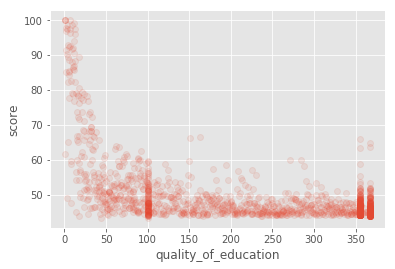

In [75]:
plt.plot(data['quality_of_education'], data['score'], 'o', alpha=0.1)
plt.xlabel('quality_of_education')
plt.ylabel('score')
pass

В таблице присутствуют данные за 2012, 2013, 2014 и 2015 года. Возьмем данные только за 2015 год. Как видно, пропущенных значений нет.

In [76]:
data = data.loc[data['year'] == 2015]
print(data.count())

world_rank              1000
institution             1000
country                 1000
national_rank           1000
quality_of_education    1000
alumni_employment       1000
quality_of_faculty      1000
publications            1000
influence               1000
citations               1000
broad_impact            1000
patents                 1000
score                   1000
year                    1000
dtype: int64


Некоторые столбцы нас не интересуют, удалим их. Столбец "world_rank" нас не интересует, так как присутствует столбец "score", из которого и получается ранг.

In [77]:
data.drop(['institution', 'world_rank', 'year'], axis=1, inplace=True)

Распределим столбцы на категориальные и числовые

In [78]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['country']
['national_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 'score']


Проверим есть ли в категориальных данных бинарные. Бинарных данных нет.

In [79]:
data_describe = data.describe(include=[object])
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['country']


Рассмотрим столбец "Страна" и векторизуем его

In [80]:
data['country'].unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'South Korea', 'Canada', 'France', 'China', 'Taiwan', 'Russia',
       'Singapore', 'Sweden', 'Denmark', 'Germany', 'Belgium',
       'Netherlands', 'Australia', 'Norway', 'Finland', 'Italy', 'Spain',
       'Brazil', 'South Africa', 'Hong Kong', 'Ireland', 'Austria',
       'Portugal', 'New Zealand', 'Czech Republic', 'Greece', 'Thailand',
       'Mexico', 'India', 'Argentina', 'Chile', 'Poland', 'Hungary',
       'Iceland', 'Turkey', 'Malaysia', 'Slovenia', 'Estonia', 'Croatia',
       'Saudi Arabia', 'Colombia', 'Lebanon', 'Slovak Republic', 'Iran',
       'Serbia', 'Lithuania', 'Egypt', 'Bulgaria', 'Uruguay', 'Uganda',
       'Cyprus', 'United Arab Emirates', 'Puerto Rico', 'Romania'],
      dtype=object)

In [81]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['country_Argentina', 'country_Australia', 'country_Austria',
       'country_Belgium', 'country_Brazil', 'country_Bulgaria',
       'country_Canada', 'country_Chile', 'country_China', 'country_Colombia',
       'country_Croatia', 'country_Cyprus', 'country_Czech Republic',
       'country_Denmark', 'country_Egypt', 'country_Estonia',
       'country_Finland', 'country_France', 'country_Germany',
       'country_Greece', 'country_Hong Kong', 'country_Hungary',
       'country_Iceland', 'country_India', 'country_Iran', 'country_Ireland',
       'country_Israel', 'country_Italy', 'country_Japan', 'country_Lebanon',
       'country_Lithuania', 'country_Malaysia', 'country_Mexico',
       'country_Netherlands', 'country_New Zealand', 'country_Norway',
       'country_Poland', 'country_Portugal', 'country_Puerto Rico',
       'country_Romania', 'country_Russia', 'country_Saudi Arabia',
       'country_Serbia', 'country_Singapore', 'country_Slovak Republic',
       'country_Slovenia', 

Числовые данные нормализуем

In [82]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis=0)) / data_numerical.std(axis=0)

Соеденим получившиеся данные

In [90]:
data = pd.DataFrame(pd.concat((data_numerical, data_nonbinary), axis=1), dtype=int)
print(data.shape, data.columns)
print(data.dtypes)

(1000, 69) Index(['national_rank', 'quality_of_education', 'alumni_employment',
       'quality_of_faculty', 'publications', 'influence', 'citations',
       'broad_impact', 'patents', 'score', 'country_Argentina',
       'country_Australia', 'country_Austria', 'country_Belgium',
       'country_Brazil', 'country_Bulgaria', 'country_Canada', 'country_Chile',
       'country_China', 'country_Colombia', 'country_Croatia',
       'country_Cyprus', 'country_Czech Republic', 'country_Denmark',
       'country_Egypt', 'country_Estonia', 'country_Finland', 'country_France',
       'country_Germany', 'country_Greece', 'country_Hong Kong',
       'country_Hungary', 'country_Iceland', 'country_India', 'country_Iran',
       'country_Ireland', 'country_Israel', 'country_Italy', 'country_Japan',
       'country_Lebanon', 'country_Lithuania', 'country_Malaysia',
       'country_Mexico', 'country_Netherlands', 'country_New Zealand',
       'country_Norway', 'country_Poland', 'country_Portugal',
    

Подготовим данные для обучения

In [91]:
X = data.drop(['score'], axis=1)
y = data['score']
feature_name = X.columns
N, d = X.shape
print(X.shape, y.shape)

(1000, 68) (1000,)


Разделим данные на обучающую и тренировучную выборки

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
print(N_train, N_test)

200 800


C:\Users\happy\Anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Используем классификатор "k ближайших соседей". Количество соседей = 10.

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [95]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)
print(err_train, err_test)

0.08 0.06


In [94]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

C:\Users\happy\Anaconda3\envs\ml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)